In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
cols = {"pvp":np.array([62, 150, 205]),
        "DNA-associated":np.array([248, 242, 16]),
        "transcriptional_regulator":np.array([248, 193, 87]),
        "packaging_assembly":np.array([110, 110, 255]),
        "adsorption-related":np.array([174, 214, 241]),
        "cell_wall_depolymerase":np.array([255, 92, 139]),
        "RNA-associated":np.array([223, 255, 0]),
        "nucleotide_metabolism":np.array([249, 231, 159]),
        "ejection":np.array([0,255,255]),
        "phosphorylation":np.array([142, 68, 173]),
        "transferase":np.array([151, 68, 0]),
        "reductase":np.array([245, 183, 177]),
        "crispr":np.array([171, 235, 198]),
        "anti-restriction":np.array([171, 235, 198]),
        "sir2":np.array([171, 235, 198]),
        "toxin":np.array([171, 235, 198]),
        "super_infection":np.array([171, 235, 198]),
        "lysis":np.array([255, 92, 139]),
        "unknown":np.array([218, 224, 224])}

In [4]:
def create_genome_map(phage_id, empathi_preds, cols, total_prots, plot_legend=False):
    preds = pd.DataFrame(empathi_preds.idxmax(axis=1), columns=["pred"])
    preds["num"] = preds.index.str.rpartition("_").get_level_values(2)
    preds["id"] = preds.index.str.rpartition("_").get_level_values(0)
    preds.num = preds.num.astype(int)

    all_preds = pd.Series(["unknown"]*total_prots, name="pred")
    all_preds.index = all_preds.index + 1
    preds = preds.loc[preds.id == phage_id]
    preds.index = preds.num
    all_preds = all_preds.drop(index=preds.index)
    all_preds = pd.concat([all_preds, preds.drop(columns=["num", "id"])]).sort_index()

    data_3d = np.ndarray(shape=(2, all_preds.shape[0], 3), dtype=int)
    for i in range(0, 2):
        for j in range(0, all_preds.shape[0]):
            data_3d[i][j] = cols[all_preds.loc[j+1, "pred"]]

    plt.subplots(figsize=(20, 2))
    plt.imshow(data_3d)
    plt.yticks([])
    plt.xticks([])

    if plot_legend:
        for entry in cols:
            mycolor = cols[entry] / 256
            plt.plot(0, 0, "-", color=mycolor, label=entry)

        legend = plt.legend(ncol=len(cols)//2, loc='center', bbox_to_anchor=(0.5, 2))
    #plt.savefig(f"genome_map_empathi_{phage_id}.pdf")
    plt.show()

In [5]:
genomesKeep = ["PP079056.1", "PP079085.1", "M8_k141_924718_flag_3_multi_24.0006_len_41597", "M4_k141_35418_flag_1_multi_27.0000_len_48381",
               "LN_4A01_VL_218_NODE_1_length_174356_cov_452.708355", "LN_7A03_VL_382_NODE_59_length_53592_cov_35.050208"]

# Empathi

In [27]:
empathi = pd.read_csv("empathi_predictions_6genomes.csv", index_col=0)
empathi = empathi.sort_index(ascending=False)

In [28]:
general = ['pvp','DNA-associated', 'transcriptional_regulator','packaging_assembly', 'adsorption-related', 'cell_wall_depolymerase',
       'RNA-associated', 'nucleotide_metabolism', 'ejection','phosphorylation', 'transferase', 'reductase', 'crispr',
       'anti-restriction', 'sir2', 'toxin', 'super_infection', 'lysis']
empathi_preds = empathi.loc[(empathi.loc[:, empathi.columns.isin(general)] > 0.5).sum(axis=1) != 0, general]

In [8]:
print("Number of proteins assigned a function in the 6 genomes kept in the article.")
empathi_tmp = empathi.loc[empathi.index.str.rpartition("_").get_level_values(0).isin(genomesKeep)]
num95 = ((empathi_tmp.loc[:, empathi_tmp.columns.isin(general)] > 0.95).sum(axis=1) != 0).sum()
num75 = ((empathi_tmp.loc[:, empathi_tmp.columns.isin(general)] > 0.75).sum(axis=1) != 0).sum()
num50 = ((empathi_tmp.loc[:, empathi_tmp.columns.isin(general)] > 0.5).sum(axis=1) != 0).sum()
print(f"Num preds at conf 95%: {num95}")
print(f"Num preds at conf 75%: {num75}")
print(f"Num preds at conf 50%: {num50}")

Number of proteins assigned a function in the 6 genomes kept in the article.
Num preds at conf 95%: 260
Num preds at conf 75%: 348
Num preds at conf 50%: 414


In [10]:
print(f"Total num prots in 6 genomes: {empathi.loc[empathi.index.str.rpartition('_').get_level_values(0).isin(genomesKeep)].shape[0]}")

Total num prots in 6 genomes: 574


In [9]:
tmp = empathi.loc[empathi.index.str.rpartition('_').get_level_values(0).isin(genomesKeep)]
tmp.loc[:, "id"] = tmp.index.str.rpartition('_').get_level_values(0)
tmp.value_counts("id")

/tmp/ipykernel_14481/582892442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.loc[:, "id"] = tmp.index.str.rpartition('_').get_level_values(0)


id
LN_4A01_VL_218_NODE_1_length_174356_cov_452.708355    261
LN_7A03_VL_382_NODE_59_length_53592_cov_35.050208      78
M4_k141_35418_flag_1_multi_27.0000_len_48381           65
PP079085.1                                             64
M8_k141_924718_flag_3_multi_24.0006_len_41597          60
PP079056.1                                             46
Name: count, dtype: int64

# Phrogs

In [3]:
def create_genome_map_phrogs(phage_id, preds, cols_phrogs, total_prots, plot_legend=False):
    preds["num"] = preds.index.str.rpartition("_").get_level_values(2)
    preds["id"] = preds.index.str.rpartition("_").get_level_values(0)
    preds.num = preds.num.astype(int)

    all_preds = pd.Series(["unknown"]*total_prots, name="Category")
    all_preds.index = all_preds.index + 1
    preds = preds.loc[preds.id == phage_id]
    preds.index = preds.num
    all_preds = all_preds.drop(index=preds.index)
    all_preds = pd.concat([all_preds, preds.drop(columns=["num", "id"])]).sort_index()
    all_preds.Category = all_preds.Category.str.replace("unknown function", "unknown")

    data_3d = np.ndarray(shape=(2, all_preds.shape[0], 3), dtype=int)
    for i in range(0, 2):
        for j in range(0, all_preds.shape[0]):
            data_3d[i][j] = cols_phrogs[all_preds.loc[j+1, "Category"]]

    plt.subplots(figsize=(20, 2))
    plt.imshow(data_3d)
    plt.yticks([])
    plt.xticks([])

    if plot_legend:
        for entry in cols_phrogs:
            mycolor = cols_phrogs[entry] / 256
            plt.plot(0, 0, "-", color=mycolor, label=entry)

        legend = plt.legend(ncol=len(cols_phrogs)//2, loc='center', bbox_to_anchor=(0.5, 2))
    plt.savefig(f"genome_map_phold_{phage_id}.pdf")
    plt.show()

In [4]:
cols_phrogs = {'tail':np.array([93, 173, 226]),
        'DNA, RNA and nucleotide metabolism':np.array([247, 255, 98]),
        'transcription regulation':np.array([248, 193, 87]),
        "head and packaging":np.array([41, 128, 185]),
        'integration and excision':np.array([247, 220, 111]),
        'connector':np.array([174, 214, 241]),
        "moron, auxiliary metabolic gene and host takeover":np.array([253, 254, 254]),
        "other":np.array([173, 188, 183]),
        "lysis":np.array([255, 92, 139]),
        'unknown':np.array([218, 224, 224])}

In [11]:
anno = pd.read_csv("phrog_index.csv") #as downloaded from PHROG website
anno = anno.loc[:, ["#phrog", "Annotation", "Category"]]

phrogs = pd.read_csv("phrogs/phrogs_hhsuite_db/results.filt.tsv", sep="\t", header=None) #PHROG predictions for all proteins
phrogs.columns = ["query", "target", "pident", "length", "mismatch", "gapopen", "qstart", "qend", "sstart", "send", "evalue", "bitscore"]
phrogs = phrogs.loc[:, ["query", "target","evalue"]]
phrogs["query"] = phrogs["query"].astype(str)

In [17]:
phrogs_tmp = phrogs.loc[phrogs["query"].str.split(" ").str[0].str.rpartition("_")[0].isin(genomesKeep)]
print(f"Num preds in 6 genomes that we kept: {len(phrogs_tmp.loc[:, 'query'].str.split(' ').str[0].unique())}")

Num preds in 6 genomes that we kept: 232


In [18]:
phrogs = pd.merge(phrogs, anno, how="left", left_on="target", right_on="#phrog")
phrogs = phrogs.dropna(subset=["Annotation"])
    
phrogs = phrogs.loc[phrogs.sort_values("evalue", ascending=True).loc[:, ["query"]].drop_duplicates().index, :]
phrogs = phrogs.reset_index(drop=True)
phrogs = phrogs.set_index("query")
phrogs.index.name = None
    
phrogs = phrogs.drop(columns=["target", "evalue"])
phrogs.index = phrogs.index.str.split(" ").str[0]

# VPF-PLM

In [17]:
vpf = pd.read_csv("vpf-plm/genomesKeep_function_predictions.csv") #vpf-plm predictions for proteins in 6 genomes
vpf.protein_id = vpf.protein_id.str.split(" ").str[0].str.lstrip(">")
vpf = vpf.rename(columns={"class_phrog": "Category"})
vpf.index = vpf.protein_id
vpf.index.name = None
vpf=vpf.drop(columns=["protein_id"])
vpf = vpf.loc[vpf.Category != "unknown"].sort_values("phrog_model_score")
vpf = vpf[~vpf.index.duplicated(keep='first')]

In [69]:
print("Number of proteins that were predicted a function in the 6 genomes kept in the article.")
vpf_tmp = vpf.loc[vpf.index.str.rpartition("_").get_level_values(0).isin(genomesKeep)]
print(f"Num preds with conf >0.95: {len(vpf_tmp.loc[(vpf_tmp.Category != 'unknown') & (vpf_tmp.phrog_model_score > 0.95)])}")
print(f"Num preds with conf >0.75: {len(vpf_tmp.loc[(vpf_tmp.Category != 'unknown') & (vpf_tmp.phrog_model_score > 0.75)])}")
print(f"Num preds with conf >0.50: {len(vpf_tmp.loc[(vpf_tmp.Category != 'unknown') & (vpf_tmp.phrog_model_score > 0.50)])}")
print(f"Num preds total: {len(vpf_tmp.loc[vpf_tmp.Category != 'unknown'])}")

Number of proteins that were predicted a function in the 6 genomes kept in the article.
Num preds with conf >0.95: 120
Num preds with conf >0.75: 154
Num preds with conf >0.50: 188
Num preds total: 202


# Visualization

PP079092.1


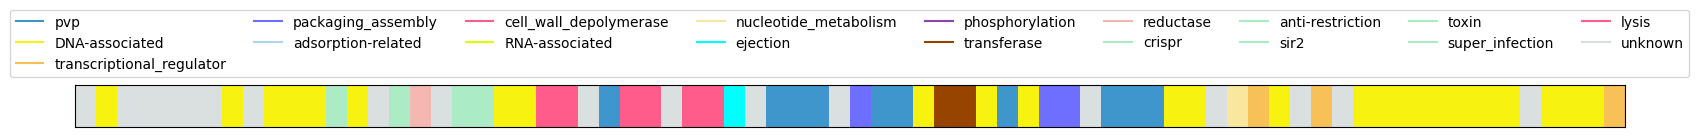

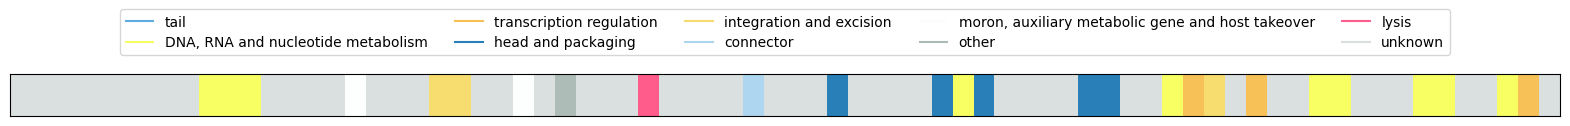

PP079092.1


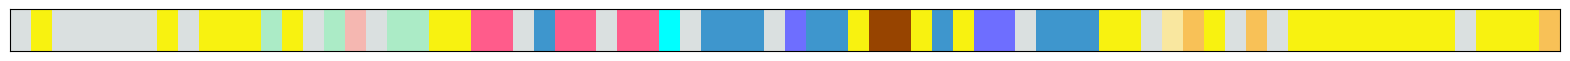

PP079085.1


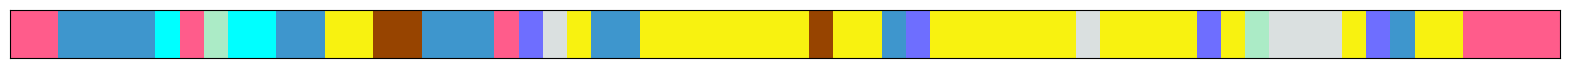

PP079084.1


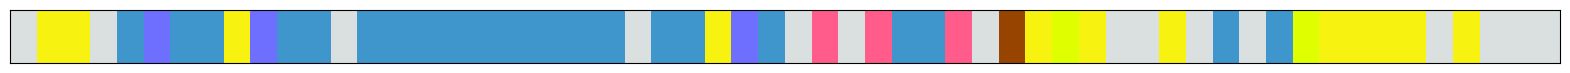

PP079083.1


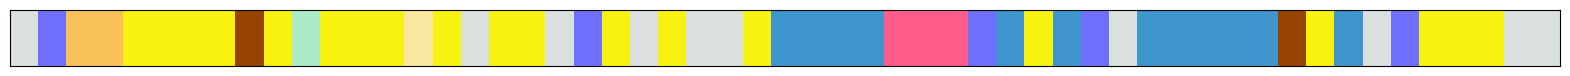

PP079056.1


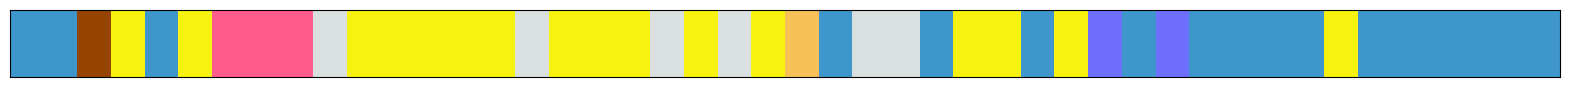

M8_k141_924718_flag_3_multi_24.0006_len_41597


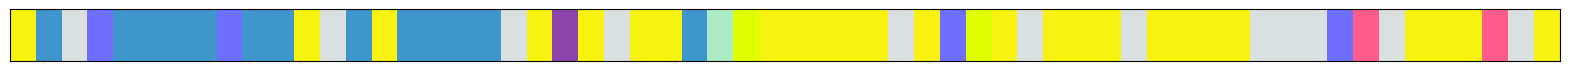

M4_k141_35418_flag_1_multi_27.0000_len_48381


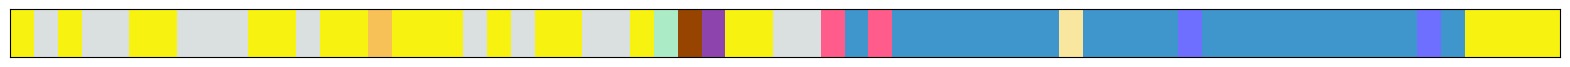

M3_k141_417954_flag_3_multi_43.0000_len_41934


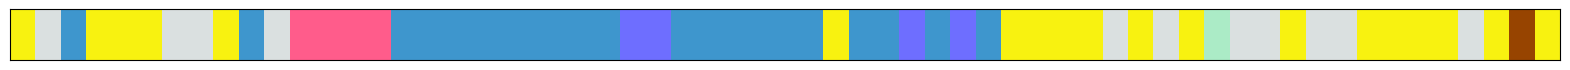

M1_k141_967162_flag_3_multi_21.0007_len_31175


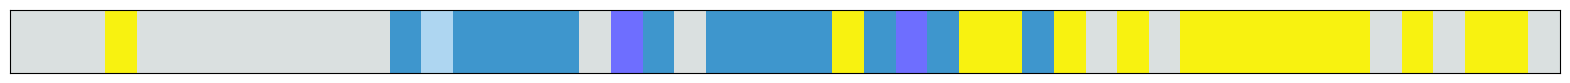

M14_k141_85025_flag_1_multi_28.9056_len_52871


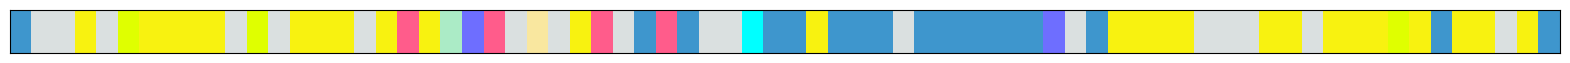

LN_7A04_VL_383_NODE_1_length_113282_cov_27449.647231


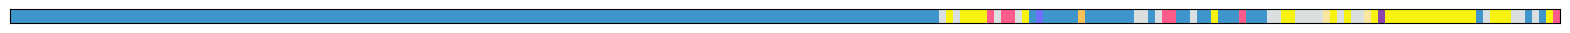

LN_7A03_VL_382_NODE_59_length_53592_cov_35.050208


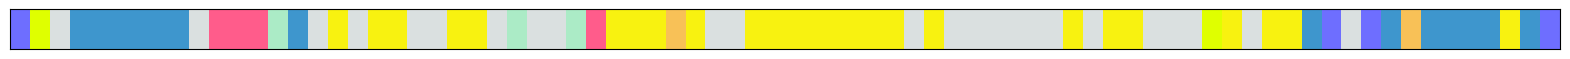

LN_7A02_VL_381_NODE_20_length_42315_cov_1222.371462


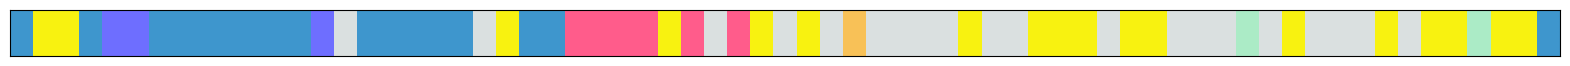

LN_7A02_VL_381_NODE_143_length_7396_cov_8.951233


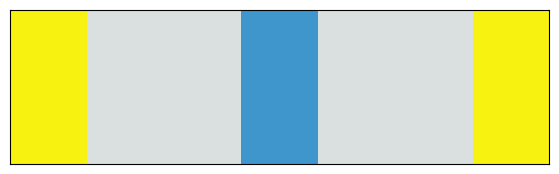

LN_4A01_VL_218_NODE_1_length_174356_cov_452.708355


In [28]:
print("PP079092.1")
total_prots = empathi.index.str.rpartition("_").get_level_values(0).value_counts()["PP079092.1"]
create_genome_map("PP079092.1", empathi_preds, cols, total_prots, plot_legend=True) #Empathi
create_genome_map_phrogs("PP079092.1", phrogs, cols_phrogs, total_prots, plot_legend=True) #phrogs

for phage_id in empathi.index.str.rpartition("_").get_level_values(0).unique():
    print(phage_id)
    total_prots = empathi.index.str.rpartition("_").get_level_values(0).value_counts()[phage_id]

    create_genome_map(phage_id, empathi_preds, cols, total_prots, plot_legend=False) #Empathi
    #create_genome_map(phage_id, metaempathi_preds, cols, total_prots, plot_legend=False) #MetaEmpathi

    create_genome_map_phrogs(phage_id, phrogs, cols_phrogs, total_prots, plot_legend=False) #phrogs
    create_genome_map_phrogs(phage_id, vpf, cols_phrogs, total_prots, plot_legend=False) #vpf-plm

##### Proteins correctly classified by Empathi according to annotation more precise than PHROG category.

In [17]:
#ejection proteins under the head and packaging category
display(phrogs.loc["PP079085.1_7"])
display(phrogs.loc["PP079085.1_10"])
display(phrogs.loc["PP079085.1_11"])

#endolysins under the head and packaging category
display(phrogs.loc["PP079085.1_1"])
display(phrogs.loc["PP079085.1_64"])

# terminase under the head and packaging category that empathi predicts as being DNA-associated packaging-related proteins
display(phrogs.loc["PP079085.1_28"]) #small subunit
display(phrogs.loc["PP079085.1_27"]) #large subunit

# glycosyl transferases
display(phrogs.loc["PP079085.1_17"])
display(phrogs.loc["PP079085.1_16"])

#phrog                     phrog_6651
Annotation    internal virion protein
Category           head and packaging
Name: PP079085.1_7, dtype: object

#phrog                      phrog_418
Annotation    internal virion protein
Category           head and packaging
Name: PP079085.1_10, dtype: object

#phrog                      phrog_308
Annotation    internal virion protein
Category           head and packaging
Name: PP079085.1_11, dtype: object

#phrog                phrog_2860
Annotation             endolysin
Category      head and packaging
Name: PP079085.1_1, dtype: object

#phrog                phrog_2860
Annotation             endolysin
Category      head and packaging
Name: PP079085.1_64, dtype: object

#phrog                    phrog_11494
Annotation    terminase small subunit
Category           head and packaging
Name: PP079085.1_28, dtype: object

#phrog                        phrog_2
Annotation    terminase large subunit
Category           head and packaging
Name: PP079085.1_27, dtype: object

#phrog                                              phrog_14945
Annotation                                  glycosyltransferase
Category      moron, auxiliary metabolic gene and host takeover
Name: PP079085.1_17, dtype: object

#phrog                                              phrog_34859
Annotation                                  glycosyltransferase
Category      moron, auxiliary metabolic gene and host takeover
Name: PP079085.1_16, dtype: object

In [31]:
display(phrogs.loc["PP079056.1_32"]) #small subunit

#phrog                      phrog_309
Annotation    terminase small subunit
Category           head and packaging
Name: PP079056.1_32, dtype: object

# Phold

In [29]:
phold = pd.read_csv("phold/phold_per_cds_predictions.tsv", sep="\t") #fold predictions for proteins in 6 genomes
phold["Category"] = phold.function.mask(phold.function == "unknown function", "unknown")
phold = phold.set_index("cds_id")
phold.index.name = None

In [9]:
print(len(phold.loc[phold.function != "unknown function"]), "proteins with an annotated function.")

263 proteins with an annotated function.


In [10]:
phold.function.value_counts()

function
unknown function                                     311
DNA, RNA and nucleotide metabolism                    75
head and packaging                                    53
tail                                                  48
other                                                 38
connector                                             12
lysis                                                 11
moron, auxiliary metabolic gene and host takeover     10
transcription regulation                               9
integration and excision                               7
Name: count, dtype: int64

PP079056.1


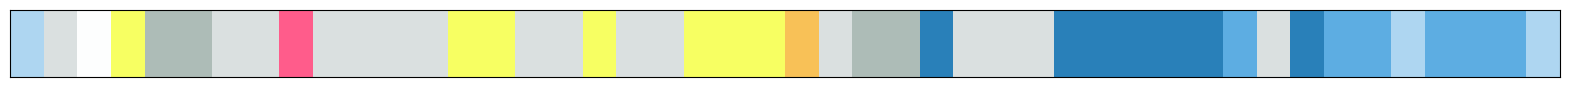

PP079085.1


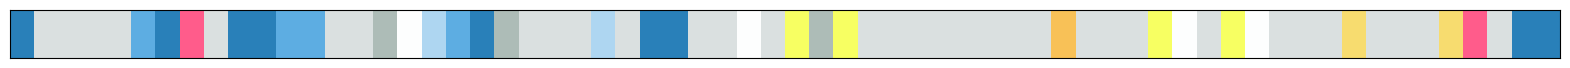

LN_4A01_VL_218_NODE_1_length_174356_cov_452.708355


LN_7A03_VL_382_NODE_59_length_53592_cov_35.050208


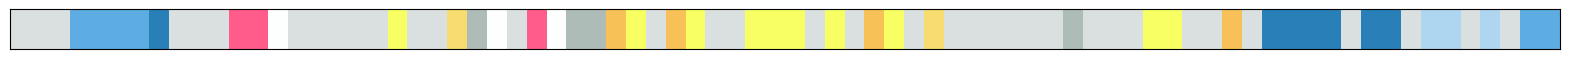

M4_k141_35418_flag_1_multi_27.0000_len_48381


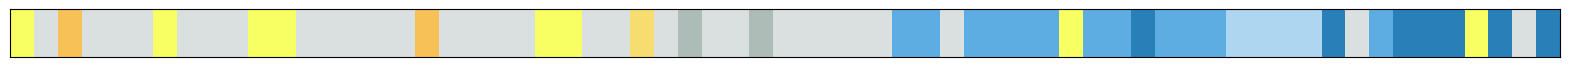

M8_k141_924718_flag_3_multi_24.0006_len_41597


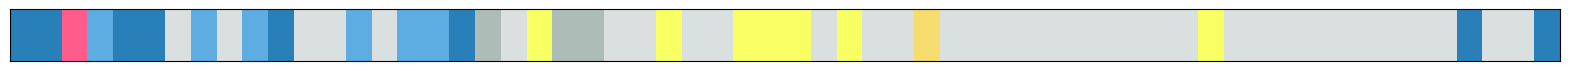

In [28]:
for phage_id in phold.index.str.rpartition("_").get_level_values(0).unique():
    print(phage_id)
    total_prots = empathi.index.str.rpartition("_").get_level_values(0).value_counts()[phage_id]
    create_genome_map_phrogs(phage_id, phold, cols_phrogs, total_prots, plot_legend=False)

In [32]:
empathi_tmp = empathi.loc[empathi.index.str.rpartition("_").get_level_values(0).isin(genomesKeep)]
empathi_tmp = empathi_tmp.loc[(empathi_tmp.loc[:, empathi_tmp.columns.isin(general)] > 0.95).sum(axis=1) < 0.95]
empathi_tmp = empathi_tmp.loc[empathi_tmp.Annotation != "unknown"]

phold.loc[empathi_tmp.index].value_counts("function")

function
unknown function                                     126
other                                                  9
DNA, RNA and nucleotide metabolism                     5
head and packaging                                     4
tail                                                   4
moron, auxiliary metabolic gene and host takeover      3
connector                                              1
integration and excision                               1
transcription regulation                               1
Name: count, dtype: int64

In [37]:
phold_tmp = phold.loc[phold.function == "unknown function"]
empathi_tmp = empathi.loc[phold_tmp.index]
empathi_tmp = empathi_tmp.loc[empathi_tmp.Annotation != "unknown"]
empathi_tmp = empathi_tmp.loc[(empathi_tmp.loc[:, empathi_tmp.columns.isin(general)] > 0.95).sum(axis=1) < 1]
empathi_tmp.value_counts("Annotation")

Annotation
DNA-associated                                                           33
pvp|tail                                                                 10
pvp                                                                       8
DNA-associated|integration                                                7
packaging_assembly                                                        6
RNA-associated                                                            5
pvp|tail|tail_appendage                                                   5
anti-restriction                                                          5
DNA-associated|nuclease                                                   4
super_infection                                                           3
DNA-associated|anti-restriction                                           3
lysis|holin                                                               3
pvp|head-tail_joining|DNA-associated                                      2
p